# **◼ Exercise 2**

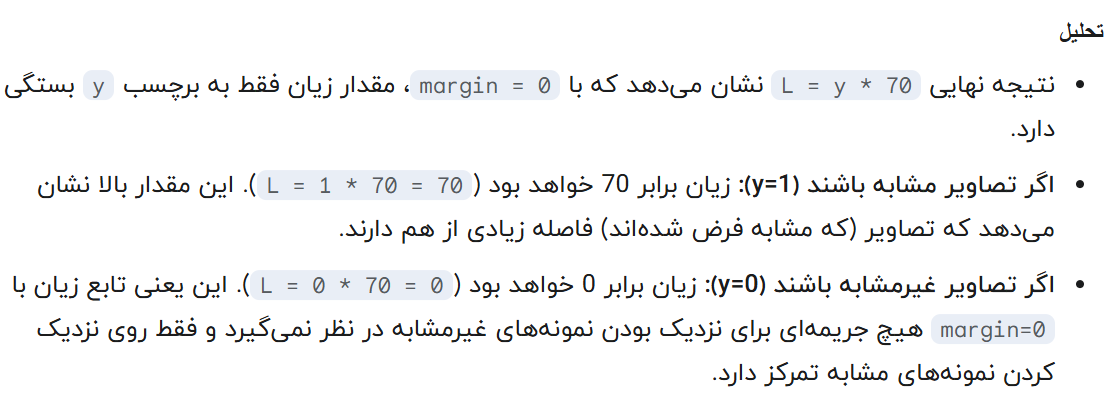

In [ ]:
import numpy as np

# Define image matrices
image_a = np.array([
    [0, 1, 4],
    [7, 2, 1],
    [2, 1, 4],
    [1, 2, 0]
])

image_b = np.array([
    [0, 2, 1],
    [0, 2, 1],
    [3, 0, 1],
    [1, 2, 0]
])

# Flatten matrices into vectors
vec_a = image_a.flatten()
vec_b = image_b.flatten()

print(f"Vector of Image A: {vec_a}")
print(f"Vector of Image B: {vec_b}")

# Calculate squared Euclidean distance (d^2)
d_squared = np.sum(np.square(vec_a - vec_b))
# Alternatively, using the norm function:
# d = np.linalg.norm(vec_a - vec_b)
# d_squared = d**2

print(f"Squared Euclidean distance (d^2): {d_squared}")

# Calculate Contrastive Loss with margin=0
margin = 0
# Assume the pair is similar (y=1)
y = 1
loss_positive = 0.5 * (y * d_squared + (1 - y) * np.maximum(0, margin - np.sqrt(d_squared))**2)

# Assume the pair is dissimilar (y=0)
y = 0
loss_negative = 0.5 * (y * d_squared + (1 - y) * np.maximum(0, margin - np.sqrt(d_squared))**2)


print(f"Contrastive Loss (with 1/2 formula and m=0) if the pair is similar (y=1): {loss_positive}")
print(f"Contrastive Loss (with 1/2 formula and m=0) if the pair is dissimilar (y=0): {loss_negative}")

# Calculate using the formula without 1/2
y=1
loss_positive_no_half = (y * d_squared + (1 - y) * np.maximum(0, margin - np.sqrt(d_squared))**2)
y=0
loss_negative_no_half = (y * d_squared + (1 - y) * np.maximum(0, margin - np.sqrt(d_squared))**2)

print(f"Contrastive Loss (without 1/2 formula and m=0) if the pair is similar (y=1): {loss_positive_no_half}")
print(f"Contrastive Loss (without 1/2 formula and m=0) if the pair is dissimilar (y=0): {loss_negative_no_half}")

Vector of Image A: [0 1 4 7 2 1 2 1 4 1 2 0]
Vector of Image B: [0 2 1 0 2 1 3 0 1 1 2 0]
Squared Euclidean distance (d^2): 70
Contrastive Loss (with 1/2 formula and m=0) if the pair is similar (y=1): 35.0
Contrastive Loss (with 1/2 formula and m=0) if the pair is dissimilar (y=0): 0.0
Contrastive Loss (without 1/2 formula and m=0) if the pair is similar (y=1): 70.0
Contrastive Loss (without 1/2 formula and m=0) if the pair is dissimilar (y=0): 0.0


# **◼ Exercise 3**

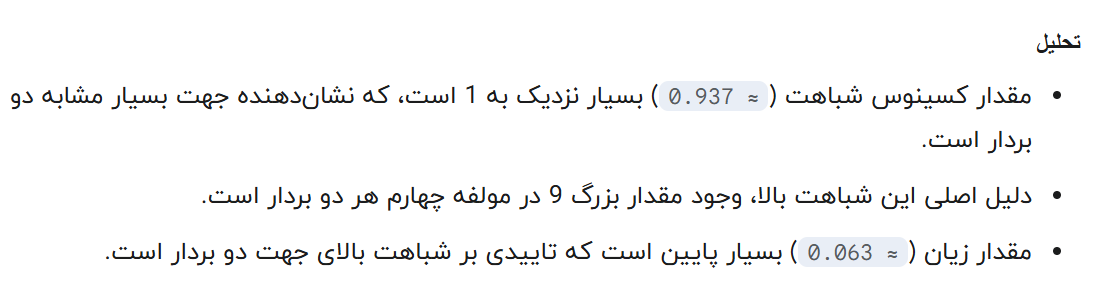

In [ ]:
import numpy as np
from numpy.linalg import norm

# Define vectors
vec_c = np.array([0, 1, 0, 9, 1])
vec_d = np.array([3, 0, 0, 9, 0])

print(f"Vector C: {vec_c}")
print(f"Vector D: {vec_d}")

# Calculate dot product
dot_product = np.dot(vec_c, vec_d)
print(f"Dot product (C . D): {dot_product}")

# Calculate vector magnitudes (L2 norm)
norm_c = norm(vec_c)
norm_d = norm(vec_d)
print(f"Magnitude of Vector C (||C||): {norm_c:.4f} (sqrt({norm_c**2:.0f}))")
print(f"Magnitude of Vector D (||D||): {norm_d:.4f} (sqrt({norm_d**2:.0f}))")

# Calculate cosine similarity
# Prevent division by zero (although not necessary in this example)
if norm_c == 0 or norm_d == 0:
    cosine_similarity = 0.0
else:
    cosine_similarity = dot_product / (norm_c * norm_d)
print(f"Cosine Similarity: {cosine_similarity:.5f}")

# Calculate Cosine Similarity Loss
cosine_similarity_loss = 1 - cosine_similarity
print(f"Cosine Similarity Loss: {cosine_similarity_loss:.5f}")

# Alternative method using Scipy (for verification)
from scipy.spatial.distance import cosine

# Note: scipy.spatial.distance.cosine calculates 1 - cosine_similarity directly
scipy_cosine_distance = cosine(vec_c, vec_d)
print(f"Cosine Distance (1 - Similarity) using SciPy: {scipy_cosine_distance:.5f}")

Vector C: [0 1 0 9 1]
Vector D: [3 0 0 9 0]
Dot product (C . D): 81
Magnitude of Vector C (||C||): 9.1104 (sqrt(83))
Magnitude of Vector D (||D||): 9.4868 (sqrt(90))
Cosine Similarity: 0.93718
Cosine Similarity Loss: 0.06282
Cosine Distance (1 - Similarity) using SciPy: 0.06282
